In [1]:
import numpy as np
import pandas as pd
import tensorflow
import tensorflow.keras
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
df = pd.read_csv("/Users/adityavs14/Documents/Internship/Pianalytix/Month_2/EEGSeizure/ML_model/Epileptic Seizure Recognition.csv",index_col=0)

In [3]:
df.head()

X1   X2   X3   X4   X5   X6   X7   X8   X9  X10  ...  X170  X171   
Unnamed                                                       ...               
X21.V1.791  135  190  229  223  192  125   55   -9  -33  -38  ...   -17   -15  \
X15.V1.924  386  382  356  331  320  315  307  272  244  232  ...   164   150   
X8.V1.1     -32  -39  -47  -37  -32  -36  -57  -73  -85  -94  ...    57    64   
X16.V1.60  -105 -101  -96  -92  -89  -95 -102 -100  -87  -79  ...   -82   -81   
X20.V1.54    -9  -65  -98 -102  -78  -48  -16    0  -21  -59  ...     4     2   

            X172  X173  X174  X175  X176  X177  X178  y  
Unnamed                                                  
X21.V1.791   -31   -77  -103  -127  -116   -83   -51  4  
X15.V1.924   146   152   157   156   154   143   129  1  
X8.V1.1       48    19   -12   -30   -35   -35   -36  5  
X16.V1.60    -80   -77   -85   -77   -72   -69   -65  5  
X20.V1.54    -12   -32   -41   -65   -83   -89   -73  5  

[5 rows x 179 columns]

In [4]:
def get_one(a):
    data = []
    for i in range(1,24):
        t = 'X'+str(i)+'.V1.'+str(a)
        if df[t == df.index].empty == False:
            data = np.concatenate((data,df[t == df.index].values[0]))
    return data

In [5]:
all_d = []
for i in tqdm(range(1,995)):
    data = get_one(i)
    if data != []:
        all_d.append(data)

  0%|                                                   | 0/994 [00:00<?, ?it/s]/var/folders/gx/cgwnkj8172lfc4nmcl9j2fqr0000gn/T/ipykernel_7258/1292496506.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if data != []:
100%|█████████████████████████████████████████| 994/994 [00:15<00:00, 65.98it/s]


In [6]:
print(len(all_d))


495


In [7]:
eeg = pd.DataFrame({'signal':all_d}, index=[i for i in range(1,496)])

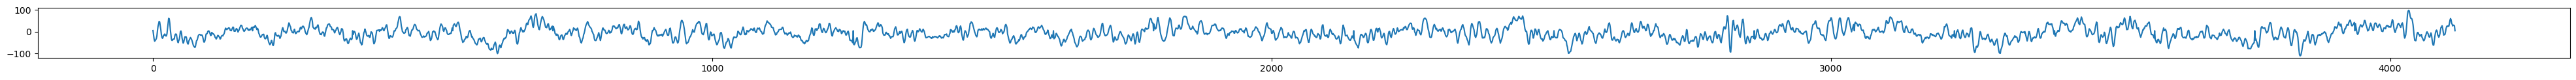

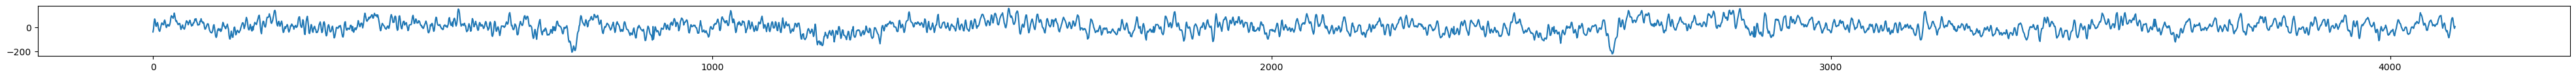

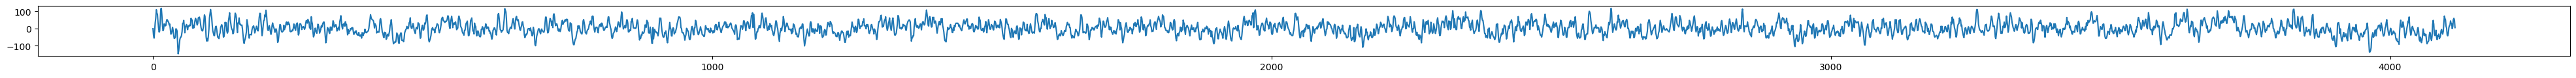

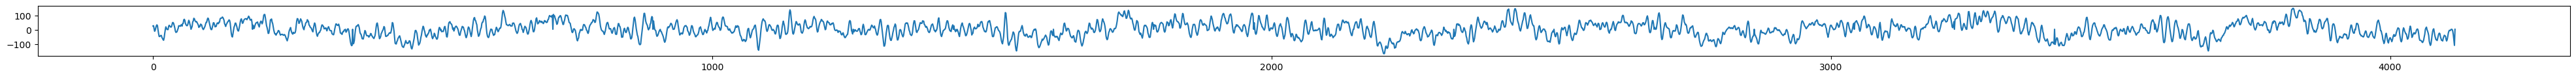

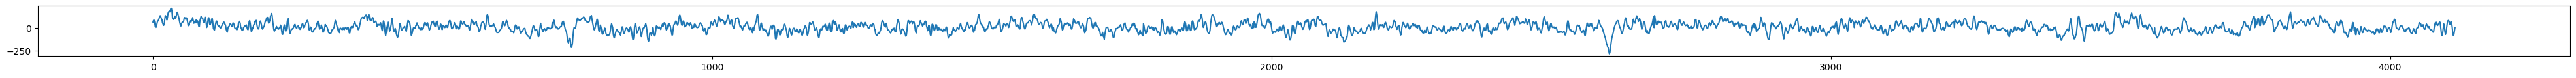

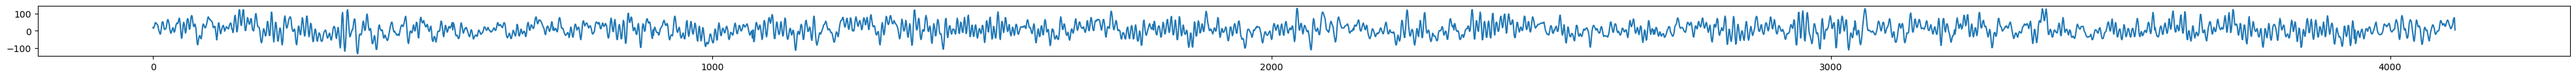

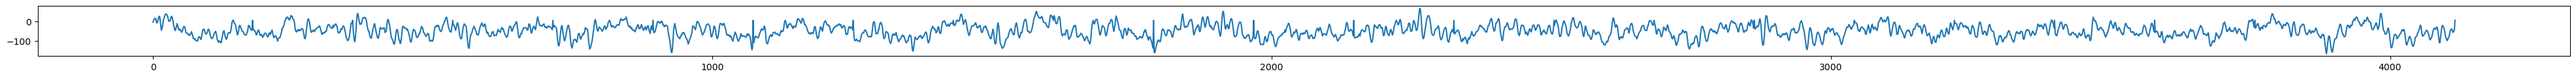

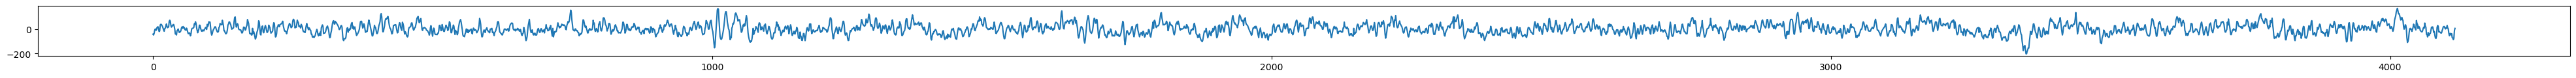

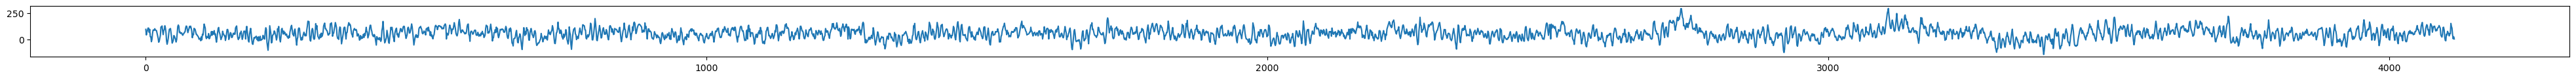

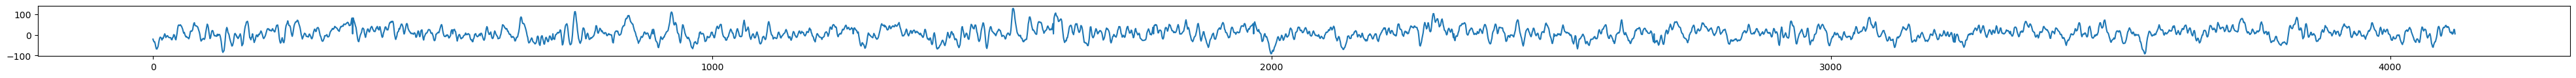

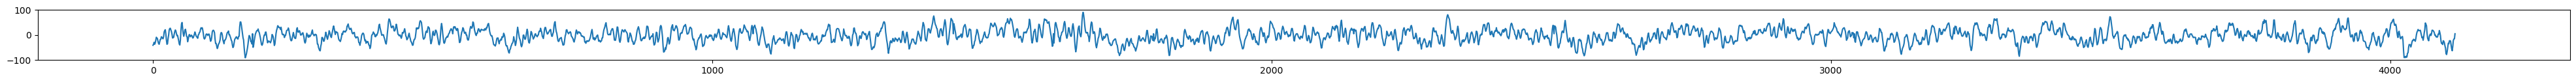

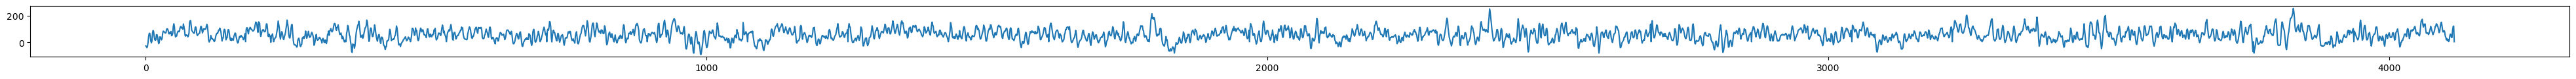

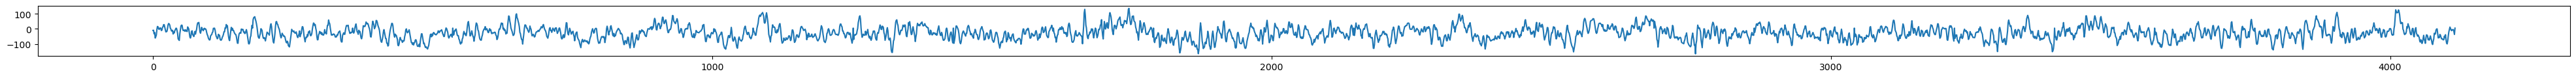

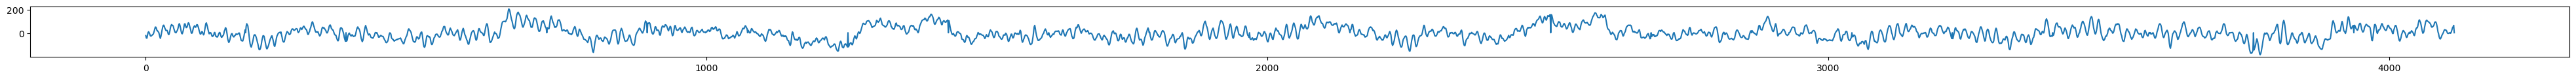

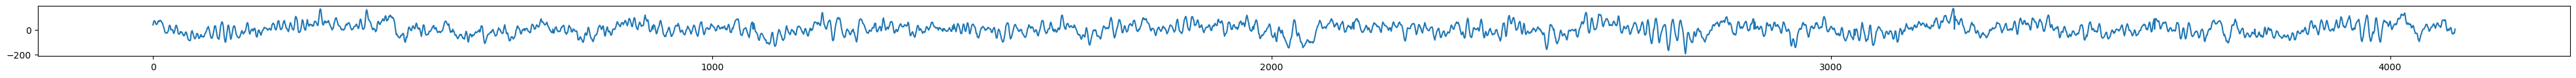

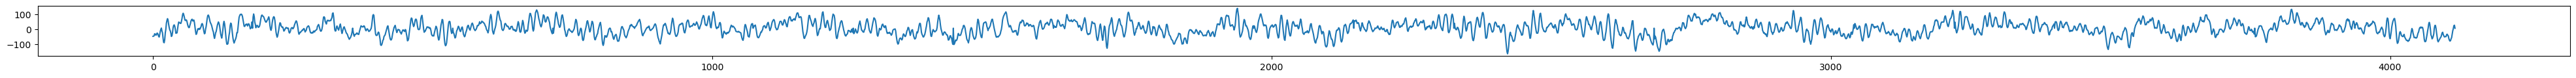

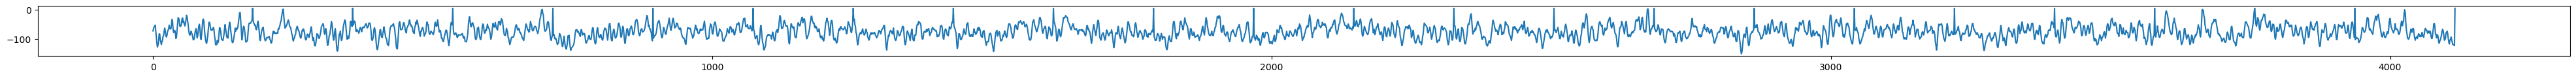

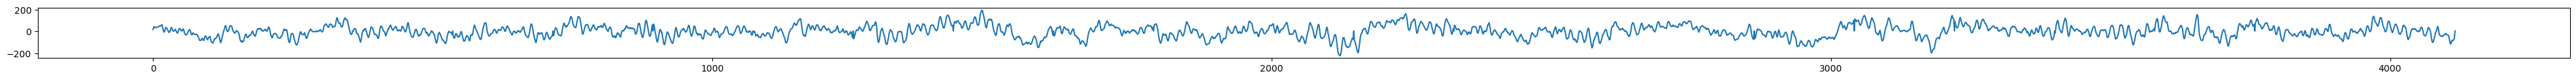

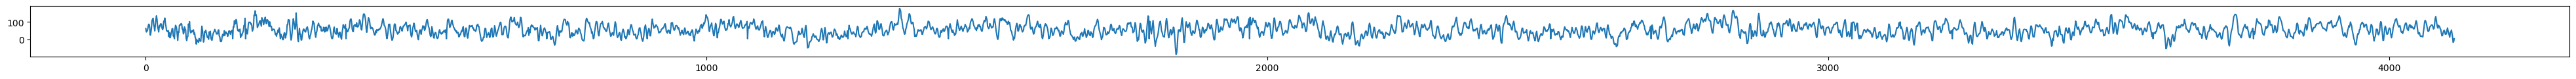

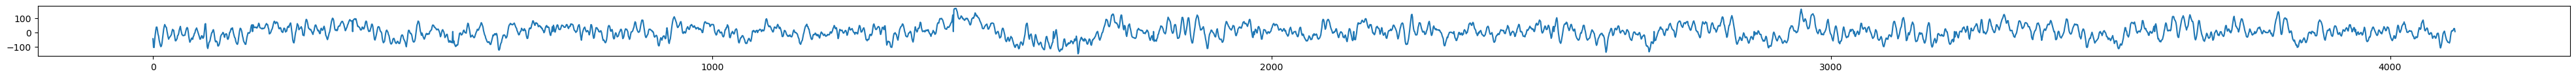

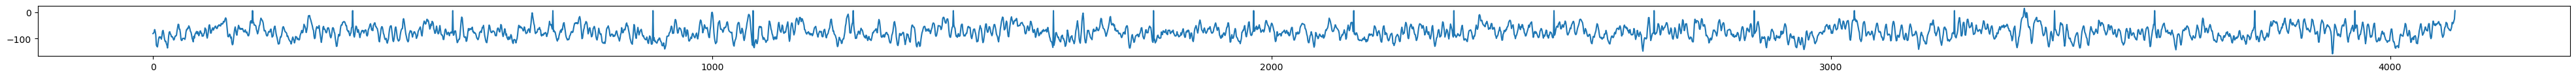

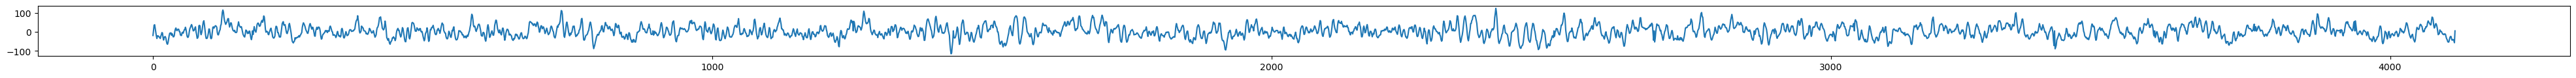

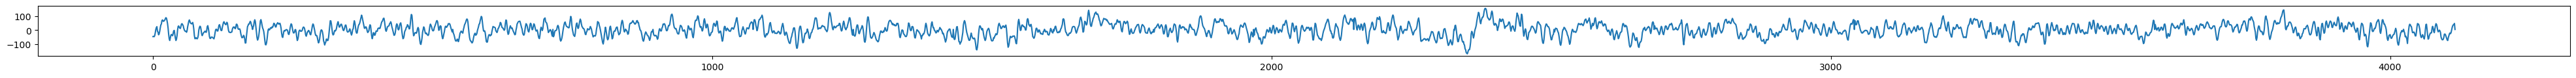

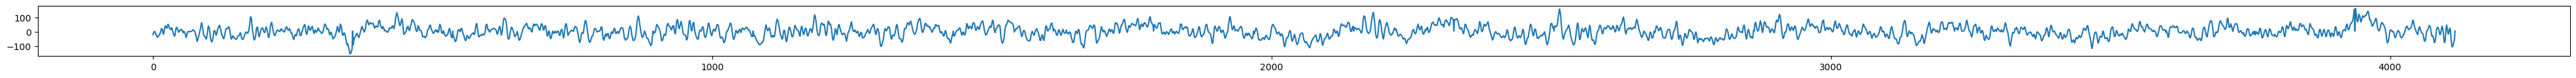

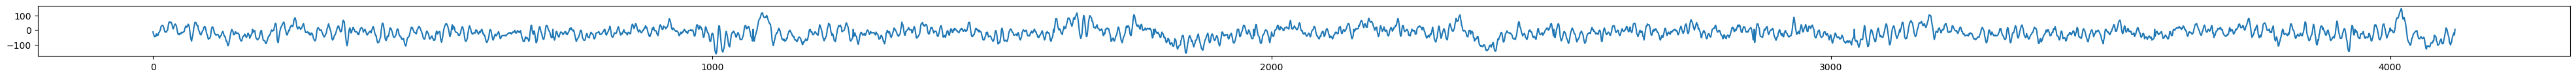

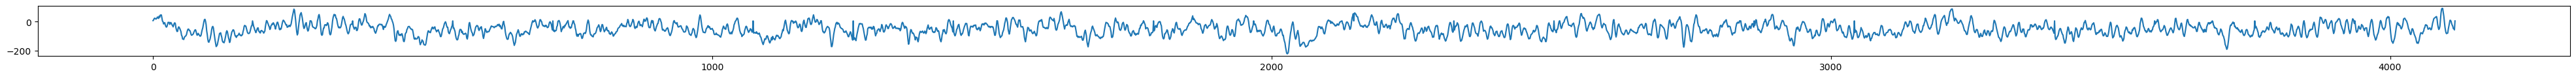

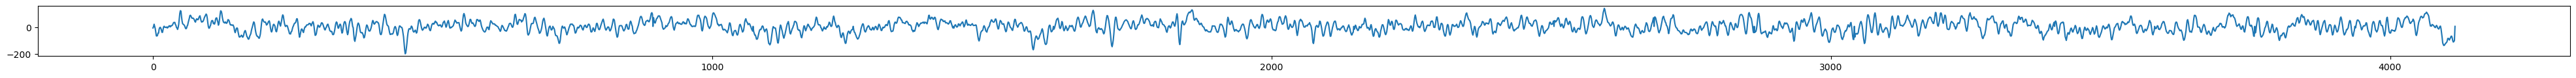

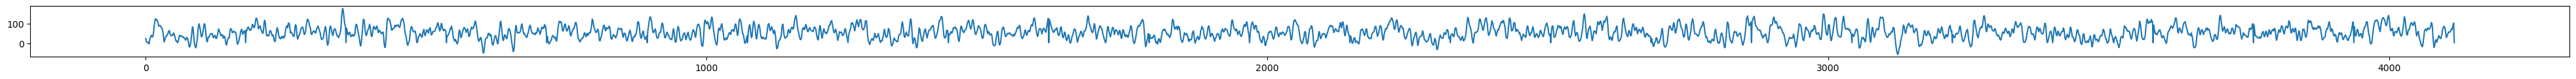

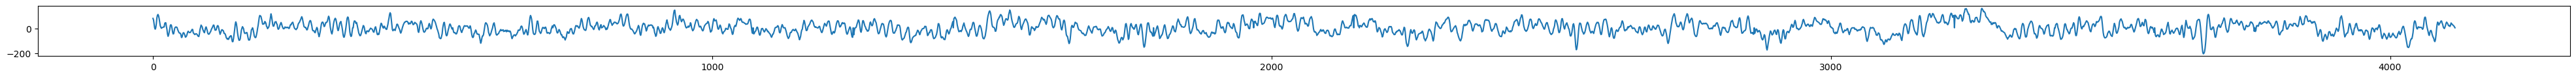

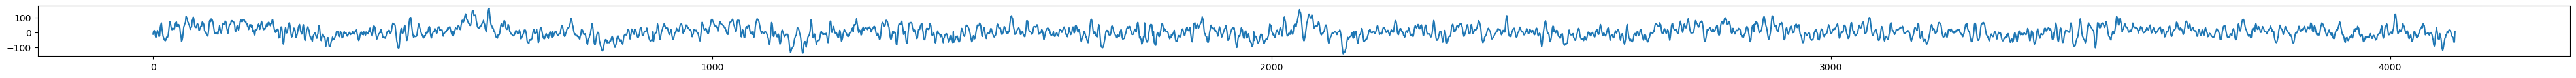

In [8]:
for i in range(20,50):
    plt.figure(figsize=(50,1))
    plt.plot(eeg.iloc[i].values[0])
    plt.show()

In [9]:
df = pd.read_csv("/Users/adityavs14/Documents/Internship/Pianalytix/Month_2/EEGSeizure/ML_model/Epileptic Seizure Recognition.csv")
df = df.drop(columns = df.columns[0]) 
df.head()

X1   X2   X3   X4   X5   X6   X7   X8   X9  X10  ...  X170  X171  X172   
0  135  190  229  223  192  125   55   -9  -33  -38  ...   -17   -15   -31  \
1  386  382  356  331  320  315  307  272  244  232  ...   164   150   146   
2  -32  -39  -47  -37  -32  -36  -57  -73  -85  -94  ...    57    64    48   
3 -105 -101  -96  -92  -89  -95 -102 -100  -87  -79  ...   -82   -81   -80   
4   -9  -65  -98 -102  -78  -48  -16    0  -21  -59  ...     4     2   -12   

   X173  X174  X175  X176  X177  X178  y  
0   -77  -103  -127  -116   -83   -51  4  
1   152   157   156   154   143   129  1  
2    19   -12   -30   -35   -35   -36  5  
3   -77   -85   -77   -72   -69   -65  5  
4   -32   -41   -65   -83   -89   -73  5  

[5 rows x 179 columns]

The number of trials for the non-seizure class is: 9200
The number of trials for the seizure class is: 2300


/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


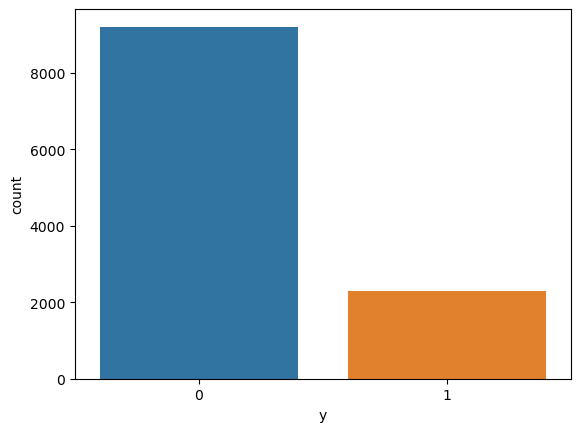

In [10]:
cols = df.columns
tgt = df.y
tgt[tgt > 1] = 0
ax = sns.countplot(tgt,label="Count")
non_seizure, seizure = tgt.value_counts()
print('The number of trials for the non-seizure class is:', non_seizure)
print('The number of trials for the seizure class is:', seizure)

In [11]:
df.isnull().sum().sum()

0

In [12]:
Y = df.iloc[:,178].values
Y.shape


(11500,)

In [13]:
Y[Y>1]=0

In [14]:
X = df.iloc[:,1:178].values
X.shape

(11500, 177)

In [15]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_train, y_train) * 100, 2)
print("Accuracy is:",(str(acc_svc)+'%'))

Accuracy is: 98.28%


In [18]:
i = 10000
new_input1 = [df.iloc[i, :177]]
a_out = [df.iloc[i, 178]]
print(new_input1)
print(a_out)

[X1     -15
X2       7
X3      19
X4      24
X5      19
        ..
X173    99
X174    83
X175    50
X176     6
X177   -31
Name: 10000, Length: 177, dtype: int64]
[1]


In [19]:
new_output = clf.predict(new_input1)
new_output

array([1])

In [20]:
new_output
if new_output==[1]:
    print('"yes" you might get seizure be conscious about it')
else:
    print('You are safe no worries :)')

"yes" you might get seizure be conscious about it


In [ ]:
import joblib
filename = 'svmeeg.joblib'
joblib.dump(clf, filename, compress=9)
#joblib.dump(sc,'scaler.joblib',compress=9)

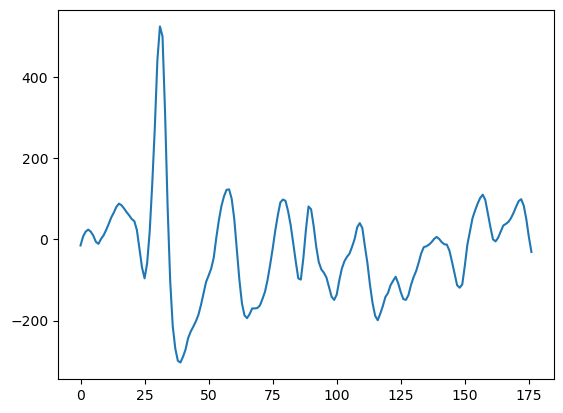

In [28]:
plt.plot(df.iloc[10000, :177].values)